# Evaluating Model's Performance

Accuracy is one but not necessarily the best metric to evaluate a model's performance. There are more informative measures to assess performance. For instance, in the case of _class imbalance_ we may need to use other techniques for evaluation.

I'll use _Diabetes_ dataset obtained from the UCI Machine Learning Repository. The goal is to predict the onset of diabetes. The dependent (target) variable "Outcome" is binary.

Outline:
* EDA and Data Preparation
* Evaluating the Performance Quantitavely
    - Accuracy (Explained in another notebook)
    - R-squared (Explained in another notebook)
    - Confusion Matrix
    - Classification Report
    - Logistic Regression and a Comparison
* Evaluating the Performance Visually
    - ROC (Receiver Operating Characteristics) Curve
    - Area Under the ROC Curve (AUC)
    - Precision-Recall Curve

![image](mindmaps/Evaluating_Model_Performance.png)

In [36]:
# Import necessary modules
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Methods for creating a confusion matrix and building a classification report
from sklearn.metrics import classification_report, confusion_matrix

# Method for building a logistic regression model
from sklearn.linear_model import LogisticRegression

# Method for visually evaluating the model 
from sklearn.metrics import roc_curve

# Methods for calculating AUC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Method for precision-recall curve
from sklearn.metrics import precision_recall_curve

## EDA and Data Preparation

>Note: I'll keep the EDA short, since the focus of this notebook is not exploring the data.

In [3]:
df = pd.read_csv("datasets/diabetes.csv")

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [7]:
# Extract features and target from the df
X = df.drop('Outcome', axis = 1).values # features
y = df['Outcome'].values # target

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

## Evaluating the Performance Quantitavely

### Confusion Matrix
A confusion matrix is used to describe the performance of a classification model on a set of test data. There are several metrics that can be calculated from the confusion matrix: _accuracy_, _precision_, _recall_ etc.

<figure>
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Preventive_Medicine_-_Statistics_Sensitivity_TPR%2C_Specificity_TNR%2C_PPV%2C_NPV%2C_FDR%2C_FOR%2C_ACCuracy%2C_Likelihood_Ratio%2C_Diagnostic_Odds_Ratio_2_Final_wiki.png/800px-Preventive_Medicine_-_Statistics_Sensitivity_TPR%2C_Specificity_TNR%2C_PPV%2C_NPV%2C_FDR%2C_FOR%2C_ACCuracy%2C_Likelihood_Ratio%2C_Diagnostic_Odds_Ratio_2_Final_wiki.png" alt="Confusion Matrix"/>
  <figcaption>Confusion Matrix via <a href="https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Preventive_Medicine_-_Statistics_Sensitivity_TPR%2C_Specificity_TNR%2C_PPV%2C_NPV%2C_FDR%2C_FOR%2C_ACCuracy%2C_Likelihood_Ratio%2C_Diagnostic_Odds_Ratio_2_Final_wiki.png/800px-Preventive_Medicine_-_Statistics_Sensitivity_TPR%2C_Specificity_TNR%2C_PPV%2C_NPV%2C_FDR%2C_FOR%2C_ACCuracy%2C_Likelihood_Ratio%2C_Diagnostic_Odds_Ratio_2_Final_wiki.png">Wikimedia Commons</a></figcaption>
</figure>

In [8]:
# from sklearn.metrics import classification_report, confusion_matrix

# Train a k-NN classifier to the data 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train) #fit
y_pred = knn.predict(X_test) #predict

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[176  30]
 [ 56  46]]


### Classification Report
Classification report gives summary of the precision, recall, F1 score for each class. 

In [10]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

   micro avg       0.72      0.72      0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



>"The **precision** is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The **recall** is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples." [source](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)

### Logistic Regression and a Comparison

First, we'll use the Logistic Regression for binary classification. Then, we'll compare the metrixs with the previous one.

In [11]:
# from sklearn.linear_model import LogisticRegression

In [12]:
# Create the classifier
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

   micro avg       0.78      0.78      0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As expected, logistic regression model outperforms k-NN model.

## Evaluating the Models Visually

### ROC Curve
ROC curve is used to assess the **classifier**'s performance. ROC Curve shows the _True Positive Rate (sensitivity, recall or probability of detection)_ against the _False Positive Rate (probability of false alarm)_, and the tradeoff between sensitivity (True Positive Rate) and specificity (True Negative Rate). Thus, any increase in sensitivity will be accompanied by a decrease in specificity.

In [15]:
# from sklearn.metrics import roc_curve

`.predict_proba()` method returns the probability of the sample for each class.

In [19]:
# Predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


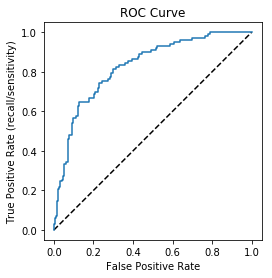

In [35]:
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

# Set the labels and the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (recall/sensitivity)')
plt.title('ROC Curve')

# Set the aspect ratio
plt.axes().set_aspect('equal')

# Show the plot
plt.show()

### Area Under the ROC Curve (AUC)

AUC is the area under the ROC curve. When the AUC is higher, the model predicts 0s and 1s better with higher seperability.

In [33]:
#from sklearn.metrics import roc_auc_score

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8268608414239482


It is also possible to use AUC with _cross-validation_.

In [34]:
#from sklearn.model_selection import cross_val_score

# Compute cross-validated AUC scores
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring = 'roc_auc')

print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86584906 0.85037736]


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

### Precision-recall Curve

Precision-recall curve is another tool to evaluate our model. (only for binary classification). Details can be found at [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) website.

In [29]:
# from sklearn.metrics import precision_recall_curve

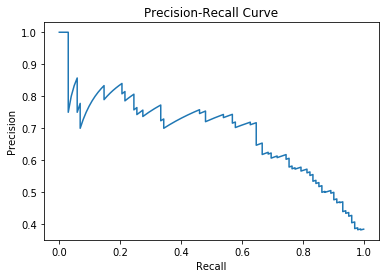

In [31]:
y_score = logreg.decision_function(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_score)

# Plot the ROC curve
plt.plot(recall, precision)

# Set the labels and the title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Set the aspect ratio
#plt.axes().set_aspect('equal')

# Show the plot
plt.show()